In [14]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense,Dropout,Flatten 
from keras.layers import Conv2D,MaxPool2D 
from keras import backend as k

In [15]:
batch_size=128
num_classes=10
epochs=12

In [16]:
#input image dimensions 
img_rows,img_cols=28,28

In [18]:
#Load mnist dataset from keras
from keras.datasets import mnist

#download mnist data and split into train & test set

(xtrain, ytrain), (xtest, ytest)=mnist.load_data()

In [19]:
print('Training set images shape: {}'.format(xtrain.shape)) 
print('Training set labels shape: {}'.format(ytrain.shape))

print('Test set images shape: {}'.format(xtest.shape))
print('Test set labels shape: {}'.format(ytest.shape))

Training set images shape: (60000, 28, 28)
Training set labels shape: (60000,)
Test set images shape: (10000, 28, 28)
Test set labels shape: (10000,)


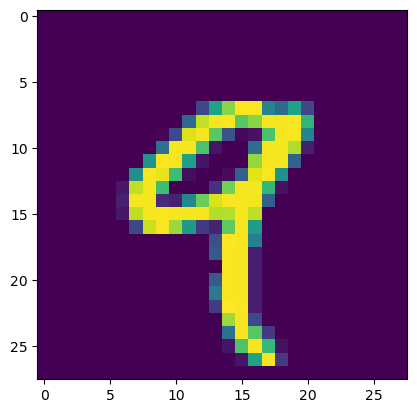

In [23]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[4])

In [24]:
xtrain[0].shape

(28, 28)

In [25]:
#reshape data to fit model

xtrain=xtrain.reshape(xtrain.shape[0],img_rows,img_cols,1)
xtest=xtest.reshape(xtest.shape[0],img_rows,img_cols,1)

print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [26]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [27]:
xtrain/=255
xtest/=255

In [28]:
print('xtrain shape:',xtrain.shape)
print(xtrain.shape[0], 'train samples')
print(xtest.shape[0],'test samples')

xtrain shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [30]:
#Convert class vectors to binary class matrices

ytrain=keras.utils.to_categorical(ytrain)
ytest=keras.utils.to_categorical(ytest)

In [43]:
ytrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [37]:
model=Sequential()

#add model Layers
model.add(Conv2D(64, kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Dropout (0.2))
model.add(Conv2D(32, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

#output Layer 
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 dropout_1 (Dropout)         (None, 26, 26, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                46090     
                                                      

In [40]:
#compile
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [42]:
result=model.fit(xtrain,ytrain,batch_size=batch_size,epochs=5,verbose=1,validation_data=(xtest,ytest))

Epoch 1/5
469/469 [==============================] - 102s 216ms/step - loss: 0.2429 - accuracy: 0.9284 - val_loss: 0.0741 - val_accuracy: 0.9772
Epoch 2/5
469/469 [==============================] - 109s 233ms/step - loss: 0.0726 - accuracy: 0.9780 - val_loss: 0.0515 - val_accuracy: 0.9840
Epoch 3/5
469/469 [==============================] - 101s 216ms/step - loss: 0.0523 - accuracy: 0.9841 - val_loss: 0.0435 - val_accuracy: 0.9852
Epoch 4/5
469/469 [==============================] - 95s 203ms/step - loss: 0.0415 - accuracy: 0.9873 - val_loss: 0.0399 - val_accuracy: 0.9859
Epoch 5/5
469/469 [==============================] - 96s 204ms/step - loss: 0.0343 - accuracy: 0.9891 - val_loss: 0.0445 - val_accuracy: 0.9859


In [44]:
score=model.evaluate(xtest,ytest, verbose=0)
print('Test Loss:',score[0])
print()
print('Test Accuracy:',score[1])

Test Loss: 0.044517409056425095

Test Accuracy: 0.9858999848365784


In [45]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

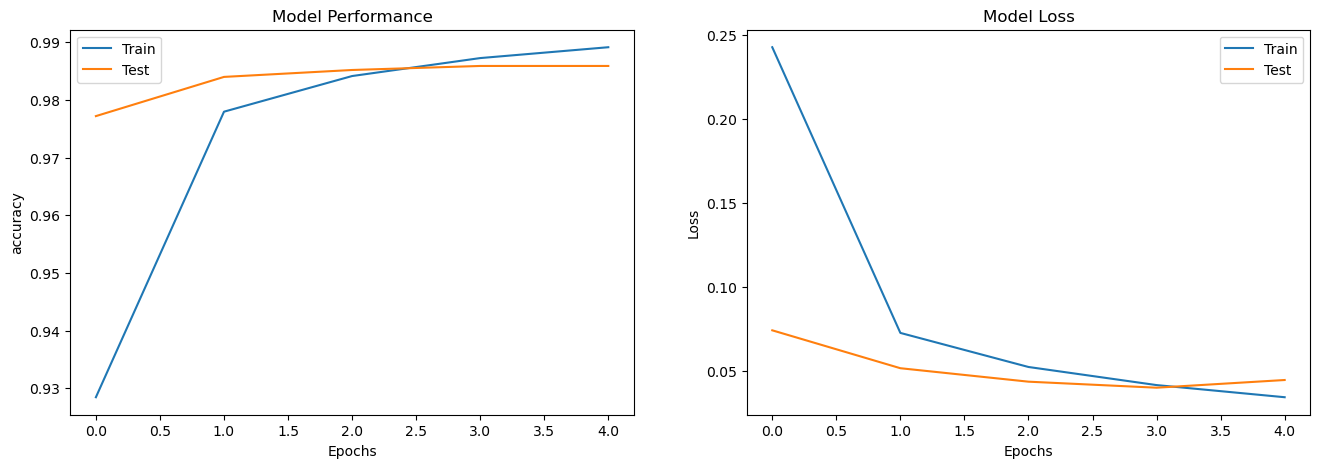

In [51]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(16,5))

#plot training & validation accuracy values

ax1.plot(result.history['accuracy']) 
ax1.plot(result.history['val_accuracy'])

ax1.set_title('Model Performance') 
ax1.set_ylabel('accuracy') 
ax1.set_xlabel('Epochs') 
ax1.legend(['Train', 'Test'])

#plot training & validation Loss values

ax2.plot(result.history['loss']) 
ax2.plot(result.history['val_loss'])

ax2.set_title('Model Loss') 
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epochs') 
ax2.legend(['Train','Test'])

In [52]:
ypred=model.predict(xtest[:4])
ypred

1/1 [==============================] - 0s 90ms/step


array([[3.6746305e-12, 3.1078291e-12, 5.2365188e-08, 9.2220725e-06,
        1.1333683e-13, 5.7481225e-11, 2.7083577e-18, 9.9999082e-01,
        3.5593386e-09, 2.5402937e-08],
       [3.0119132e-09, 1.6074404e-07, 9.9999714e-01, 7.4014417e-09,
        8.0504586e-14, 7.9063645e-11, 2.7215083e-06, 7.4916299e-13,
        4.1899806e-08, 5.5288885e-11],
       [1.7864887e-06, 9.9965072e-01, 4.2142990e-05, 6.6066377e-07,
        1.1042690e-04, 2.8693878e-06, 2.8256673e-06, 9.6275471e-05,
        9.2195827e-05, 2.0455987e-07],
       [9.9725795e-01, 7.6480058e-09, 1.4735803e-04, 8.6360587e-06,
        1.5179387e-08, 6.6887624e-05, 2.3828263e-03, 2.3531425e-06,
        4.5606330e-06, 1.2941044e-04]], dtype=float32)

In [53]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assume you have binary classification data with shape (image_height, image_width, channels)
# Adjust the input shape accordingly

model_binary = models.Sequential()

model_binary.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model_binary.add(layers.MaxPooling2D((2, 2)))

model_binary.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_binary.add(layers.MaxPooling2D((2, 2)))

model_binary.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_binary.add(layers.MaxPooling2D((2, 2)))

model_binary.add(layers.Flatten())
model_binary.add(layers.Dense(128, activation='relu'))
model_binary.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model_binary.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model_binary.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 2, 2, 128)        

In [54]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model_multiclass = models.Sequential()

model_multiclass.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_multiclass.add(layers.MaxPooling2D((2, 2)))

model_multiclass.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_multiclass.add(layers.MaxPooling2D((2, 2)))

model_multiclass.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_multiclass.add(layers.MaxPooling2D((2, 2)))

model_multiclass.add(layers.Flatten())
model_multiclass.add(layers.Dense(64, activation='relu'))
model_multiclass.add(layers.Dense(10, activation='softmax'))  # 10 classes in CIFAR-10

# Compile the model
model_multiclass.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

# Print the model summary
model_multiclass.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 2, 2, 128)       